# Red Wine Quality Prediction

Problem Statement:

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests):

1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol

Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [264]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [266]:
#Check for null
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

So we have no blank values, Lets Proceed to check for duplicates now

In [267]:
df.shape

(1599, 12)

It has 1599 rows and 12 columns

In [268]:
duplicate = df[df.duplicated(keep = 'last')]
print("Duplicate Rows :")
  
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
22,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
39,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
64,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1562,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1579,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


We can see that we have 240 rows of Duplicate values, So we need to delete them as it will not be helpful anyways

# Drop Duplicates

In [269]:
df.drop_duplicates(keep='last',inplace=True)

In [270]:
df.shape

(1359, 12)

So if we see our duplicate rows have been removed successfully and now we have 1359 rows and 12 columns

In our Problem Statement,7 or higher has been classified as 'good/1' and the remainder as 'not good/0'. Lets check the good and bad(Not good) quality wines

In [271]:
df.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
1,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
2,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
3,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1355,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1356,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1357,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Then we will reset the Index because we deleted the records and the new records reshaped must have old index

In [272]:
df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [273]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5
11,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


<AxesSubplot:xlabel='quality', ylabel='count'>

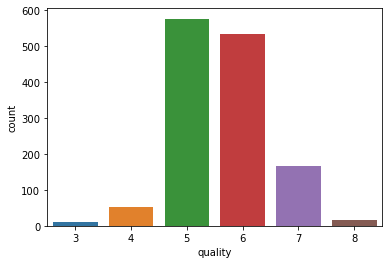

In [274]:
sns.countplot(df['quality'])

With above analysis, we can see that 184(167+17) are of good quality and remaining (1175 [1359-184])are not good

In [275]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Analysis of the data

1) Fixed Acidity : We see that IQR values are mostly between 7.1 and 9.2, though we have few values below Quartile1 and above Quartile3

2) Volatile Acidity : We see that IQR values are mostly between 0.12 and 0.64, though we have some values below Quartile1 and above Quartile3

3) Citric Acid : We see that IQR values are mostly between 0.09 and 0.43, though we have few values below Quartile1 and above Quartile3

4) Residual Sugar :We see that IQR values are mostly between 1.9 and 2.6, though we have few values below Quartile1 and above Quartile3. We notice that max value(15.50) is almost 6 times of the IQR range and hence a high max Outlier.

5) Chlorides :We see that IQR values are mostly between 0.07 and 0.09, though we have few values below Quartile1 and above Quartile3. We notice that max value(0.611) is more than 6 times of the IQR range and hence a high max Outlier.

7) Free Sulphar Dioxide :We see that IQR values are mostly between 7 and 21, though we have few values below Quartile1 and above Quartile3. 

8) Total Sulphar Dioxide :We see that IQR values are mostly between 22 and 63, though we have few values below Quartile1 and above Quartile3. 

9) Density : Density has very small difference in data with IQR between 0.995600 and 0.997820. The minimum and maximum values are also very close to each other.

10) pH : pH also has very small difference in data with IQR between 3.21 and 3.4. The minimum and maximum values are also very close to each other.


11) Alcohol :also has very small difference in data with IQR between 9.4 and 11. The minimum and maximum values are not too far.

12) Quality : It is the taget column


# Correlation

In [276]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


<AxesSubplot:>

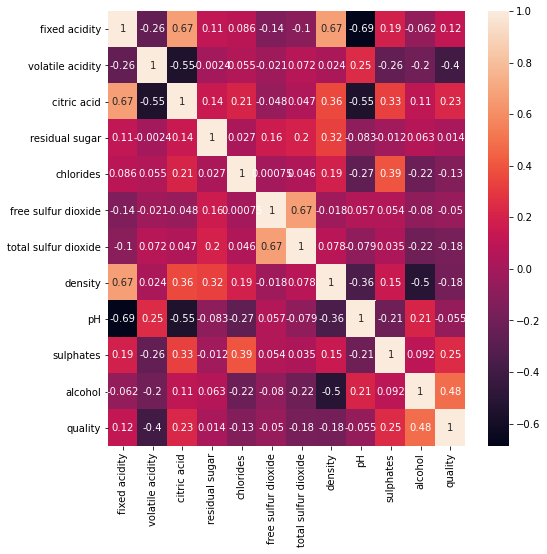

In [277]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot = True)

# Outcome of Correlation

From the above correlation plot for the given dataset for wine quality prediction, we can easily see which items are related strongly with each other and which items are related weekly with each other. For Example,

The strongly correlated items are :
1.fixed acidity and citric acid. 2.free sulphur dioxide and total sulphor dioxide. 3.fixed acidity and density.


1.alcohol and quality.
so, from above points there is a clear inference that alcohol is the most important characteristic to determine the quality of wine.


The weekly correlated items are :
1.citric acid and volatile acidity. 2.fixed acidity and ph. 3.density and alcohol.

These are some relations which do not depend on each other at all.

In [278]:
corr_matrix=df.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric acid             0.228057
fixed acidity           0.119024
residual sugar          0.013640
free sulfur dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total sulfur dioxide   -0.177855
density                -0.184252
volatile acidity       -0.395214
Name: quality, dtype: float64

We see that volatile acidity, total sulphor dioxide, chlorides, density are very less related to the dependent variable 
quality so even if we remove these columns the accuracy won't be affected that much and alcoholo is most correlated with quality


# Outlier Checking

Plot all the columns apart from quality column as quality is the target

In [279]:
dataToPlot=df.loc[:, df.columns != 'quality']
dataToPlot.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8


Save the Target to plot in one varaible

In [280]:
targetToPlot=df.loc[:, df.columns == 'quality']
targetToPlot.head(2)

,quality
1,5
2,5


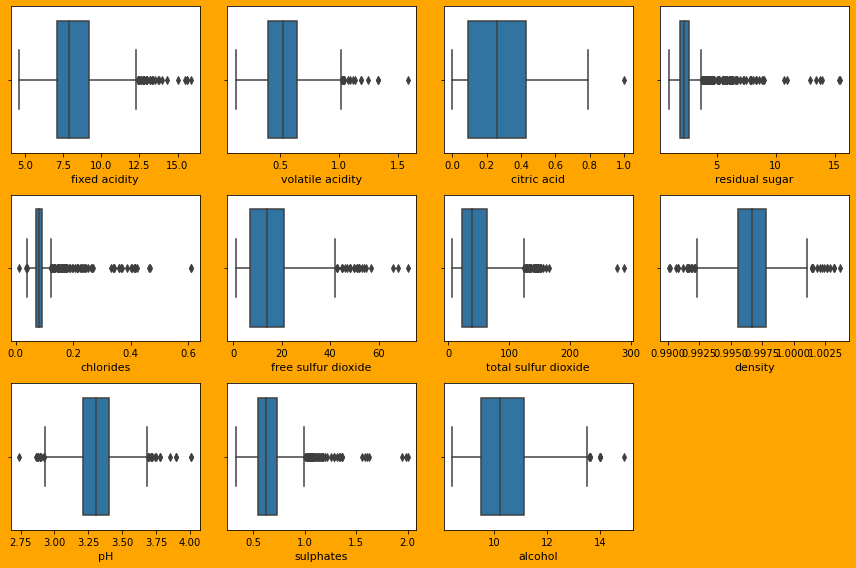

In [281]:
#Lets see data distribution again
plt.figure(figsize=(12,8),facecolor='orange')
graph=1

for column in dataToPlot:
    
    if graph<=12:
        ax=plt.subplot(3,4,graph)        
        sns.boxplot(dataToPlot[column])
        plt.xlabel(column,fontsize=11)
        
    graph+=1   
    
plt.tight_layout()

From the above box plot we see that 

a) Columns Residual Sugar,chlorides Fixed Acidity, Free Sulphar dioxide, Total Sulphar dioxide,Sulphates has more outliers

b) pH ,density,citric acid and alcohol has less outliers

c) We have outliers in density and pH where the values are lesser than Quartile 1

# ScatterPlot

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

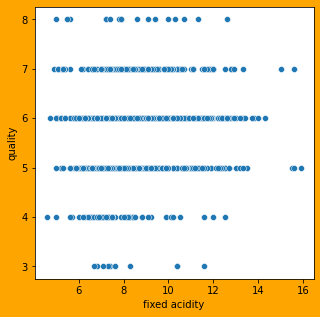

In [282]:
#Lets see data distribution using Fixed Acidity(Independent Variable) and quality(Dependent Variable)
plt.figure(figsize=(5,5),facecolor='orange')
sns.scatterplot(x="fixed acidity",y="quality",data=df)

We see that Fixed Acidity is equally distributed between the range 5 to 13 and when the Fixed Acidity increses the quality increases, however fixed acidity with very good quality and bad quality is an exception to this. These can be the outliers to the data which we will try to remove and check that we with less data removal we get more accuracy.Lets see the data further and check this with other columns.

Also most of the data are present for quality 6,7,5 and 4 respectively. Quality with score 8 and 3 have significantly lesser data than 3

<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

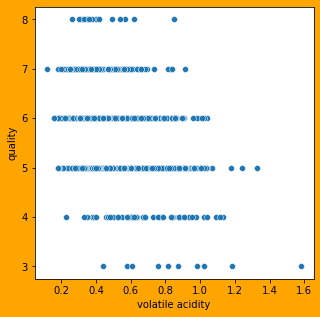

In [283]:
#Lets see data distribution using volatile Acidity(Independent Variable) and quality(Dependent Variable)
plt.figure(figsize=(5,5),facecolor='orange')
sns.scatterplot(x="volatile acidity",y="quality",data=df)

We see that Fixed Acidity is equally distributed between the range 0.2 to 1.1. Here we notice very few outliers and most of the data lies where the quality is 5,6 and 7. Quality 4 also contributes good amount of data followed by 8 and 3 respectively

<AxesSubplot:xlabel='citric acid', ylabel='quality'>

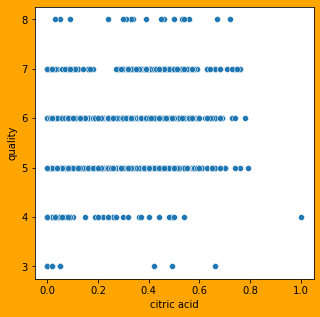

In [284]:
#Lets see data distribution using citric acid(Independent Variable) and quality(Dependent Variable)
plt.figure(figsize=(5,5),facecolor='orange')
sns.scatterplot(x="citric acid",y="quality",data=df)

We see that quality is between 5 to 7 when citric acid is in the range of 0.0 to 0.8. Most importantly we have good amount of data where the quality is 5,6,7 and 4,8,3 respectively

<AxesSubplot:xlabel='residual sugar', ylabel='quality'>

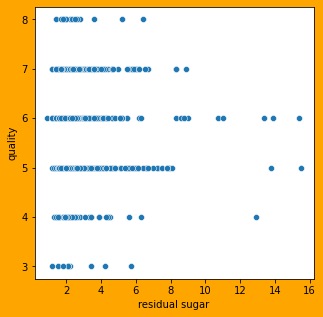

In [285]:
#Lets see data distribution using residual sugar(Independent Variable) and quality(Dependent Variable)
plt.figure(figsize=(5,5),facecolor='orange')
sns.scatterplot(x="residual sugar",y="quality",data=df)

We see that in residual sugar, most of the data lies between 1 to 5 and has lot of outliers. Data lies everywhere between the quality 5,7 and 6. 4,8 and 1 also has data in the order of quality

<AxesSubplot:xlabel='chlorides', ylabel='quality'>

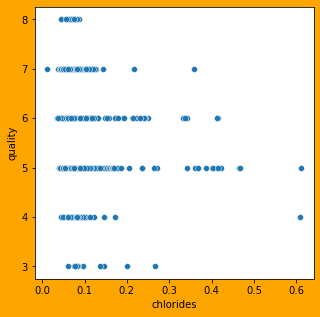

In [286]:
#Lets see data distribution using chlorides(Independent Variable) and quality(Dependent Variable)
plt.figure(figsize=(5,5),facecolor='orange')
sns.scatterplot(x="chlorides",y="quality",data=df)

We see that most of the data lies between the range 0.012000 to 0.2 and most of the data is present where the quality is 4,5,6 and 7. Quality 8 and 3 contribute less amount of data

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='quality'>

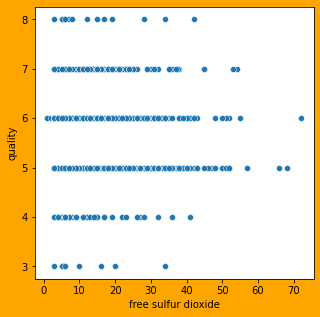

In [287]:
#Lets see data distribution using free sulfur dioxide(Independent Variable) and quality(Dependent Variable)
plt.figure(figsize=(5,5),facecolor='orange')
sns.scatterplot(x="free sulfur dioxide",y="quality",data=df)

For Free Sulfar dioxide, We see that most of the values are in the range of 0 to 45 and most of the data are present where the quality is 5,6 and 7

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='quality'>

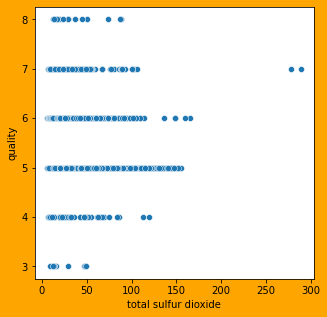

In [288]:
#Lets see data distribution using total sulfur dioxide(Independent Variable) and quality(Dependent Variable)
plt.figure(figsize=(5,5),facecolor='orange')
sns.scatterplot(x="total sulfur dioxide",y="quality",data=df)

For Total Sulfar dioxide, We see that most of the values are in the range of 5 to 100 and most of the data are present where the quality is 5,6,7,4 respectively. 8 and 3 contributes less amount of data.

<AxesSubplot:xlabel='density', ylabel='quality'>

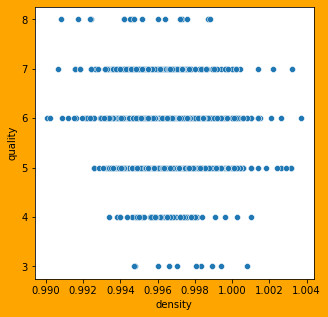

In [289]:
#Lets see data distribution using density(Independent Variable) and quality(Dependent Variable)
plt.figure(figsize=(5,5),facecolor='orange')
sns.scatterplot(x="density",y="quality",data=df)

For density, We see that most of the values are equally distributed in where Quality is 4,5,6 and 7 with few outliers

<AxesSubplot:xlabel='pH', ylabel='quality'>

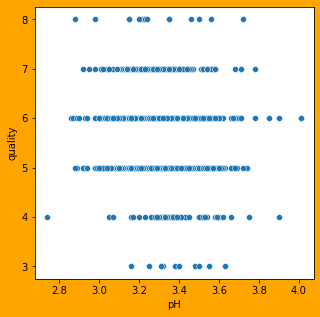

In [290]:
#Lets see data distribution using pH(Independent Variable) and quality(Dependent Variable)
plt.figure(figsize=(5,5),facecolor='orange')
sns.scatterplot(x="pH",y="quality",data=df)

For density, We see that most of the values are equally distributed in range between 2.9 to 3.7 with few outliers

<AxesSubplot:xlabel='sulphates', ylabel='quality'>

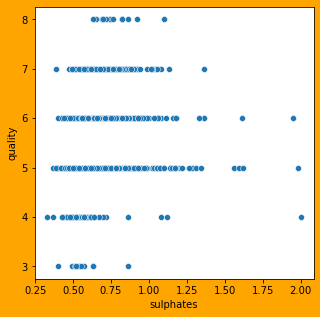

In [291]:
#Lets see data distribution using sulphates(Independent Variable) and quality(Dependent Variable)
plt.figure(figsize=(5,5),facecolor='orange')
sns.scatterplot(x="sulphates",y="quality",data=df)

For sulphates, We see that most of the values are equally distributed where the quality is 5,6 and 7 in the range of 0.25 to 1.25

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

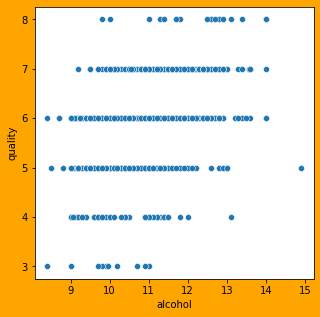

In [292]:
#Lets see data distribution using alcohol(Independent Variable) and quality(Dependent Variable)
plt.figure(figsize=(5,5),facecolor='orange')
sns.scatterplot(x="alcohol",y="quality",data=df)

Here also, we notice that most of the alcohol are equally dsitributed between the rane 7 to 13 and Quality 4,5 6 and 7 contributes most amount of data.

# Distplot

In [293]:
#Features into x
X=df.iloc[:,:-1]

#Vector in y
y=df.iloc[:,-1]

In [294]:
X.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8


In [295]:
y[6]

5

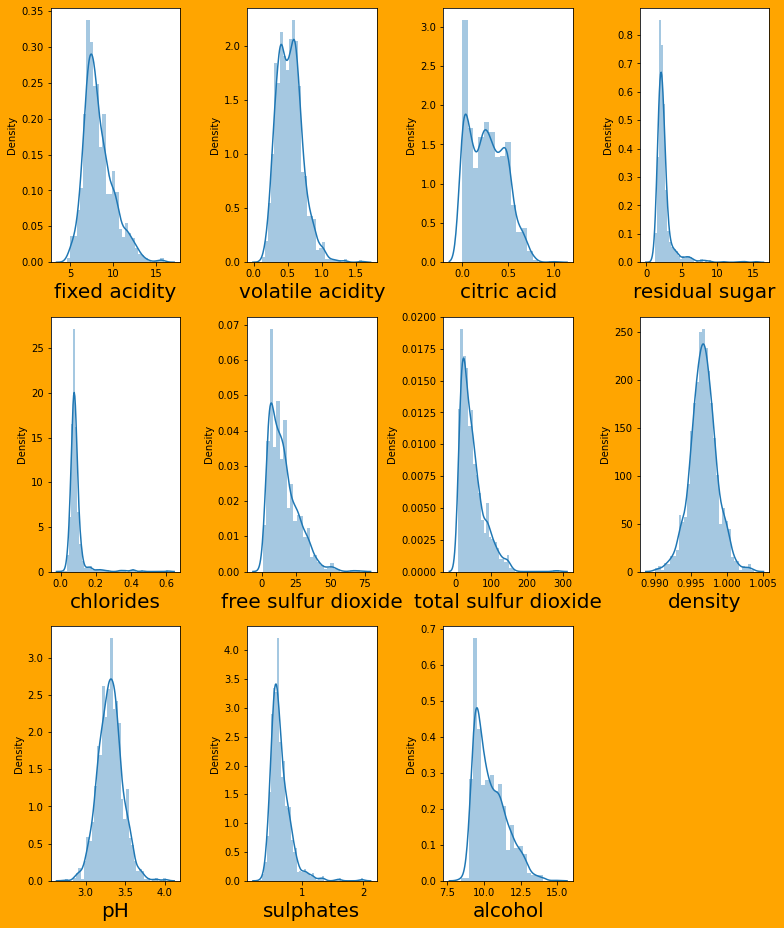

In [296]:
#Lets see data distribution again
plt.figure(figsize=(11,13),facecolor='orange')
plotnumber=1

for column in X:
    #print(column)
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)        
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1   
    
plt.tight_layout()

Here we notice the skewness, and most of the data is right skewed. pH looks fine and density,alcohol is liitle bit right skewed. Lets understand this further using dk.skew method

# Skewness

In [297]:
df.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                 0.192407
dtype: float64

The skewness value lies between -0.5 to 0.5, if our data lies between -0.5 to 0.5, then data is not skewed.

But here, we notice that data is highly skewed. However, pH and quality is not skewed.

So we will have to remove the skewness of the data.

# Data Cleaning

In [298]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


Dropping the columns

1) Chlorides : It has too many Outliers, It is highly negatively correlate with quality with value -0.130988 and Skewness 5.502487

2) Density : Desnity has outliers on both sides and it is highly neagtively correlated with value -0.184252 and even Skewness is 0.044778, So it is also safe to remove this column

3) Volatile Acidity is also not contributing much and is not correlated with any columns. It has correlation values of -0.395214, Hence it is also safe to remove.

4) Residual Sugar : The scatter plot clearly shows that residual sugar is almost everywhere in each quality with closer values, so this will be of no use to us.It is highly skewed with value 4.548153 and has lot of outliers. It has no proper correlation with any column, so its also safe to remove

In [299]:
# Removing Unnecassary columns from the dataset

df = df.drop(['volatile acidity', 'chlorides', 'density','residual sugar'], axis = 1)

# checking the shape of the dataset
print(df.shape)

(1359, 8)


In [300]:
df.head(2)

,fixed acidity,citric acid,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
1,7.8,0.00,25.0,67.0,3.20,0.68,9.8,5
2,7.8,0.04,15.0,54.0,3.26,0.65,9.8,5


# Z-Score to remove Outliers

In [301]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(1359, 8)

In [302]:
threshold=3
print(np.where(z>3))

(array([  11,   12,   13,   13,   15,   39,   41,   53,   75,   80,   83,
         84,   87,   96,   99,  128,  135,  135,  135,  150,  201,  214,
        226,  295,  296,  302,  309,  327,  341,  348,  385,  400,  408,
        448,  450,  473,  483,  484,  506,  510,  512,  534,  555,  562,
        563,  564,  564,  581,  591,  597,  602,  626,  687,  710,  718,
        771,  790,  791,  836,  895,  918,  920,  945,  963,  984, 1003,
       1048, 1060, 1060, 1081, 1082, 1103, 1106, 1107, 1120, 1123, 1125,
       1151, 1159, 1165, 1216, 1245, 1251, 1253, 1275, 1325], dtype=int64), array([5, 2, 2, 3, 5, 5, 4, 2, 5, 5, 5, 5, 4, 5, 3, 6, 1, 4, 5, 5, 5, 0,
       5, 5, 5, 0, 3, 0, 0, 2, 0, 7, 6, 3, 7, 0, 0, 0, 2, 6, 3, 5, 5, 3,
       3, 0, 6, 3, 3, 7, 4, 5, 5, 6, 7, 7, 2, 2, 2, 5, 3, 3, 4, 2, 2, 2,
       2, 2, 3, 6, 6, 2, 7, 4, 4, 5, 4, 2, 5, 7, 2, 7, 2, 7, 7, 2],
      dtype=int64))


In [303]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1359, 8)
(1278, 8)


# Percnetage Data Loss

In [304]:
loss_percentage= ((1359-1278)/1359)*100
loss_percentage

5.960264900662252

So, it's 5.96% Percentage loss, which is not bad

Now, Model without Outliers is df and model with desired outliers is df_new

Now let's plot Boxplot and check outliers

In [305]:
dataToPlot=df_new.loc[:, df.columns != 'quality']
dataToPlot.head(2)

,fixed acidity,citric acid,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
1,7.8,0.00,25.0,67.0,3.20,0.68,9.8
2,7.8,0.04,15.0,54.0,3.26,0.65,9.8


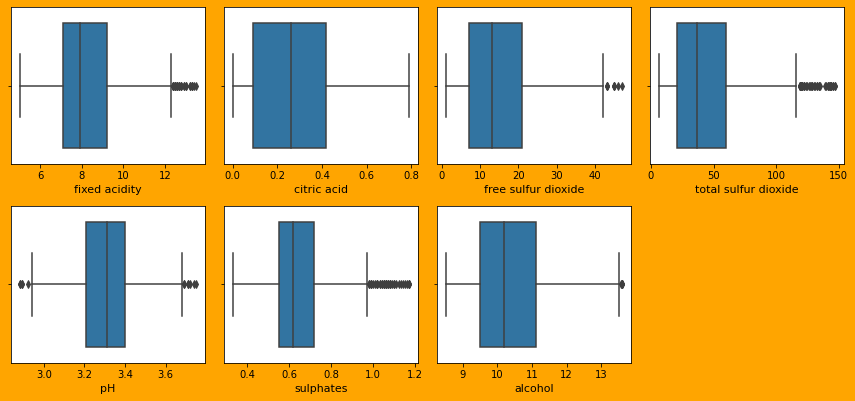

In [306]:
#Lets see data distribution again
plt.figure(figsize=(12,8),facecolor='orange')
graph=1

for column in dataToPlot:
    
    if graph<=12:
        ax=plt.subplot(3,4,graph)        
        sns.boxplot(dataToPlot[column])
        plt.xlabel(column,fontsize=11)
        
    graph+=1   
    
plt.tight_layout()

We see that almost all the columns have reduced the outliers but total sulfar dioxide still has outliers, let apply IRQ on these but we should make sure that we should not have much data loss.

In [307]:
df_new.rename(columns={"total sulfur dioxide": "total_sulfur_dioxide"}, errors="raise",inplace=True)

In [308]:
df_new.head(2)

,fixed acidity,citric acid,free sulfur dioxide,total_sulfur_dioxide,pH,sulphates,alcohol,quality
1,7.8,0.00,25.0,67.0,3.20,0.68,9.8,5
2,7.8,0.04,15.0,54.0,3.26,0.65,9.8,5


In [309]:
# Find IQR to identify Outliers
# 1st Quantile
q1=df_new.quantile(0.25)

# 2nd Quantile
q3=df_new.quantile(0.75)


iqr=q3-q1


In [310]:
iqr

fixed acidity            2.10
citric acid              0.33
free sulfur dioxide     14.00
total_sulfur_dioxide    39.00
pH                       0.19
sulphates                0.17
alcohol                  1.60
quality                  1.00
dtype: float64

Now lets check for total_sulfur_dioxide

In [311]:
total_sulfur_dioxide_high=(q3.total_sulfur_dioxide)+(1.5*iqr.total_sulfur_dioxide)
total_sulfur_dioxide_high

118.5

In [312]:
# Check the Index which has High Values
index= np.where(df_new['total_sulfur_dioxide']>total_sulfur_dioxide_high)
index

(array([  43,   66,   73,  104,  114,  121,  122,  128,  129,  149,  150,
         151,  153,  155,  161,  166,  174,  178,  204,  253,  335,  336,
         338,  375,  422,  423,  451,  513,  514,  554,  555,  594,  618,
         619,  633,  635,  683,  779,  951, 1113, 1127, 1189, 1245],
       dtype=int64),)

In [313]:
sulphates_high=(q3.sulphates)+(1.5*iqr.sulphates)
sulphates_high

0.9749999999999999

In [314]:
# Check the Index which has High Values
index= np.where(df_new['sulphates']>sulphates_high)
index

(array([  13,   66,   69,  126,  142,  161,  193,  224,  274,  282,  301,
         304,  305,  306,  336,  365,  387,  392,  393,  408,  409,  411,
         422,  472,  551,  553,  604,  683,  754,  927,  933,  934, 1009,
        1032, 1088, 1089, 1115, 1118], dtype=int64),)

So,we have less number of data are outliers and if we drop them, then surely we will have an increase in data loss which we cant afford. So lets keep these column and train it

In [315]:
df_new.head(1)

,fixed acidity,citric acid,free sulfur dioxide,total_sulfur_dioxide,pH,sulphates,alcohol,quality
1,7.8,0.0,25.0,67.0,3.2,0.68,9.8,5


# Transforming data to remove skewness

In [316]:
#Lets divide the data into features and vectors 
#Features into x
x=df_new.iloc[:,:-1]

#Vector in y
y=df_new.iloc[:,-1]

In [317]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

x

In [318]:
df_new.skew()

fixed acidity           0.797385
citric acid             0.275283
free sulfur dioxide     0.853409
total_sulfur_dioxide    1.128598
pH                      0.083699
sulphates               1.068763
alcohol                 0.774377
quality                 0.396026
dtype: float64

In [325]:
X_vif=df.drop(columns=['quality'])
X_vif

,fixed acidity,citric acid,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
1,7.8,0.00,25.0,67.0,3.20,0.68,9.8
2,7.8,0.04,15.0,54.0,3.26,0.65,9.8
3,11.2,0.56,17.0,60.0,3.16,0.58,9.8
4,7.4,0.00,11.0,34.0,3.51,0.56,9.4
5,7.4,0.00,13.0,40.0,3.51,0.56,9.4
...,...,...,...,...,...,...,...
1594,6.2,0.08,32.0,44.0,3.45,0.58,10.5
1595,5.9,0.10,39.0,51.0,3.52,0.76,11.2
1596,6.3,0.13,29.0,40.0,3.42,0.75,11.0
1597,5.9,0.12,32.0,44.0,3.57,0.71,10.2


So we can see that from earlier skewness values, this time the values are better than previous ones

# Standard Scalar

In [319]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(x)

In [320]:
# Finding variance Inflation factor in each scaled column i.e x.shape[1] (1/(1-R2)
# Age and Expereince, you can predict Salary, so Multi colinearity problem is there
# Thats why we first use Standard Scaler to standardise the data and then use vif

In [326]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=X_vif.columns

# Let's check the values now
vif

,vif,features
0,2.668251,fixed acidity
1,2.047928,citric acid
2,2.704584,free sulfur dioxide
3,2.968676,total sulfur dioxide
4,2.220384,pH
5,1.184638,sulphates
6,1.316835,alcohol


All the vif features are less than 5, it means no multicolinearity.Now we can move ahead filing our data to the model.Before that, lets split the data in test and training data

Now that we have cdone with Standard Scalar, lets rename the values in Quality column to Good and Not Good as stated in our problem statement and analyse further

In [327]:
#Now lets change the names of Quality according to the Problem Statement

df_new['quality'] = df_new['quality'].map({3 : 'Not Good', 4 :'Not Good', 5: 'Not Good',
                                      6: 'Good', 7: 'Good', 8: 'Good'})

In [328]:
df_new

,fixed acidity,citric acid,free sulfur dioxide,total_sulfur_dioxide,pH,sulphates,alcohol,quality
1,7.8,0.00,25.0,67.0,3.20,0.68,9.8,Not Good
2,7.8,0.04,15.0,54.0,3.26,0.65,9.8,Not Good
3,11.2,0.56,17.0,60.0,3.16,0.58,9.8,Good
4,7.4,0.00,11.0,34.0,3.51,0.56,9.4,Not Good
5,7.4,0.00,13.0,40.0,3.51,0.56,9.4,Not Good
...,...,...,...,...,...,...,...,...
1594,6.2,0.08,32.0,44.0,3.45,0.58,10.5,Not Good
1595,5.9,0.10,39.0,51.0,3.52,0.76,11.2,Good
1596,6.3,0.13,29.0,40.0,3.42,0.75,11.0,Good
1597,5.9,0.12,32.0,44.0,3.57,0.71,10.2,Not Good


In [329]:
# analyzing the different values present in the dependent variable(quality column)
df_new['quality'].value_counts()

Good        680
Not Good    598
Name: quality, dtype: int64

The dataset is quite Balanced and there are no complains of Imbalanced Dataset

<AxesSubplot:xlabel='quality', ylabel='count'>

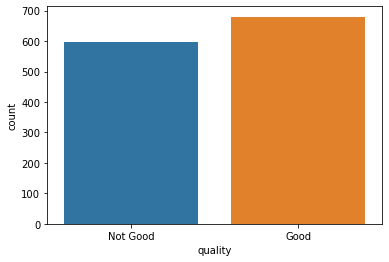

In [330]:
#Lets plot the Not Good and Good quality wines
sns.countplot(df_new['quality'])

In [331]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1278 entries, 1 to 1598
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1278 non-null   float64
 1   citric acid           1278 non-null   float64
 2   free sulfur dioxide   1278 non-null   float64
 3   total_sulfur_dioxide  1278 non-null   float64
 4   pH                    1278 non-null   float64
 5   sulphates             1278 non-null   float64
 6   alcohol               1278 non-null   float64
 7   quality               1278 non-null   object 
dtypes: float64(7), object(1)
memory usage: 122.1+ KB


Now since quality is object datatype, we need to convert it to float datatype so that our model understands the data. So lets use LabelEncoder for the same.

# LabelEncoder

In [332]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_new['quality'] = le.fit_transform(df_new['quality'])

df_new['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 1       1
2       1
3       0
4       1
5       1
       ..
1594    1
1595    0
1596    0
1597    1
1598    0
Name: quality, Length: 1278, dtype: int32>

In [333]:
df_new.head(2)

,fixed acidity,citric acid,free sulfur dioxide,total_sulfur_dioxide,pH,sulphates,alcohol,quality
1,7.8,0.00,25.0,67.0,3.20,0.68,9.8,1
2,7.8,0.04,15.0,54.0,3.26,0.65,9.8,1


In [334]:
df_new.columns

Index(['fixed acidity', 'citric acid', 'free sulfur dioxide',
       'total_sulfur_dioxide', 'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:xlabel='quality', ylabel='count'>

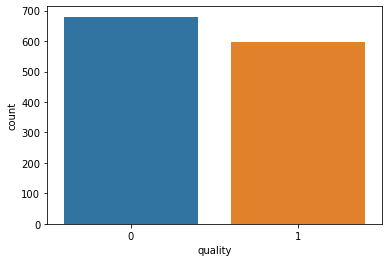

In [335]:
#Dividing the wine quality by good and not good by limits
sns.countplot(df_new['quality'])

# Dividing the dataset into Features and Target

In [336]:
features = df_new.iloc[:,:7]
target = df_new.iloc[:,7]

# determining the shape of x and y.
print(features.shape)
print(target.shape)

(1278, 7)
(1278,)


# Train-Test Split

In [337]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
from sklearn.metrics import accuracy_score

Lets choose the random state first

In [338]:
for i in range(0,100):
    x_train, x_test, y_train, y_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print("At random state : ",i,"The model performs well !")
    print("At random state",i)
    print("Training Accuracy is ",accuracy_score(y_train,pred_train)*100)
    print("Test Accuracy is ",accuracy_score(y_test,pred_test)*100)

At random state :  0 The model performs well !
At random state 0
Training Accuracy is  73.09197651663405
Test Accuracy is  71.875
At random state :  1 The model performs well !
At random state 1
Training Accuracy is  72.89628180039139
Test Accuracy is  73.4375
At random state :  2 The model performs well !
At random state 2
Training Accuracy is  72.6027397260274
Test Accuracy is  74.609375
At random state :  3 The model performs well !
At random state 3
Training Accuracy is  72.79843444227005
Test Accuracy is  73.4375
At random state :  4 The model performs well !
At random state 4
Training Accuracy is  71.81996086105676
Test Accuracy is  75.78125
At random state :  5 The model performs well !
At random state 5
Training Accuracy is  73.5812133072407
Test Accuracy is  72.65625
At random state :  6 The model performs well !
At random state 6
Training Accuracy is  72.30919765166341
Test Accuracy is  73.828125
At random state :  7 The model performs well !
At random state 7
Training Accura

Training Accuracy is  74.65753424657534
Test Accuracy is  69.53125
At random state :  62 The model performs well !
At random state 62
Training Accuracy is  72.79843444227005
Test Accuracy is  72.265625
At random state :  63 The model performs well !
At random state 63
Training Accuracy is  75.14677103718199
Test Accuracy is  66.015625
At random state :  64 The model performs well !
At random state 64
Training Accuracy is  73.28767123287672
Test Accuracy is  71.875
At random state :  65 The model performs well !
At random state 65
Training Accuracy is  71.81996086105676
Test Accuracy is  79.296875
At random state :  66 The model performs well !
At random state 66
Training Accuracy is  74.55968688845401
Test Accuracy is  69.140625
At random state :  67 The model performs well !
At random state 67
Training Accuracy is  73.67906066536204
Test Accuracy is  70.703125
At random state :  68 The model performs well !
At random state 68
Training Accuracy is  73.67906066536204
Test Accuracy is  7

In [339]:
if (round(accuracy_score(y_train,pred_train)*100,2)-round(accuracy_score(y_test,pred_test)*100,2) <=1) or (round(accuracy_score(y_test,pred_test)*100,2)-round(accuracy_score(y_train,pred_train)*100,2) <=1):
    print("At random state : ",i,"The model performs well !")
    print("At random state",i)
    print("Training Accuracy is ",accuracy_score(y_train,pred_train)*100)
    print("Test Accuracy is ",accuracy_score(y_test,pred_test)*100)

At random state :  99 The model performs well !
At random state 99
Training Accuracy is  73.97260273972603
Test Accuracy is  73.046875


So, my random state is 99, as we got by subtracting the accuracy of train score with test score

In [340]:
x_train, x_test, y_train, y_test = train_test_split(features,target, test_size = 0.20, random_state = 99)

# determining the shapes of training and testing sets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1022, 7)
(1022,)
(256, 7)
(256,)


In [341]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score

# classification report
print(classification_report(y_test, pred_test))

# confusion matrix
print(confusion_matrix(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       137
           1       0.72      0.70      0.71       119

    accuracy                           0.73       256
   macro avg       0.73      0.73      0.73       256
weighted avg       0.73      0.73      0.73       256

[[104  33]
 [ 36  83]]


So the accuracy is 73%

# Cross Validation score for Logistic Regression

In [342]:
pred_lr=lr.predict(x_test)
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsScore=cross_val_score(lr,features,target,cv=j)
    lsc=lsScore.mean()
    print("At cv",j)
    print("Cross Validation score is :",lsc*100)
    print("accuracy score is : ",lss*100)
    print('\n')
    

At cv 2
Cross Validation score is : 69.95305164319248
accuracy score is :  73.046875


At cv 3
Cross Validation score is : 71.51799687010954
accuracy score is :  73.046875


At cv 4
Cross Validation score is : 72.14831504702194
accuracy score is :  73.046875


At cv 5
Cross Validation score is : 72.14430147058823
accuracy score is :  73.046875


At cv 6
Cross Validation score is : 72.06572769953051
accuracy score is :  73.046875


At cv 7
Cross Validation score is : 72.84916488663562
accuracy score is :  73.046875


At cv 8
Cross Validation score is : 73.00117924528303
accuracy score is :  73.046875


At cv 9
Cross Validation score is : 71.51799687010956
accuracy score is :  73.046875




Since cross validation accuracy are almost same, we are heading with right approach

In [343]:
#So with above data,best CV is 4
lsScore_selected=cross_val_score(lr,features,target,cv=4).mean()
print("The CV score is :",lsScore_selected,"\n The accuracy score is: ",lss)

The CV score is : 0.7214831504702194 
 The accuracy score is:  0.73046875


# AUC ROC Curve

ROC is an evaluation metrics for Binary Classification problems and it is going to make a curve that plots the True Positive Rate against the False Positive rate at various threshold values and essentially it separates the signal from the noise. So if,the ROC Score is closer to 1, then it means the model is performing well or in laymen term the performance of the model is good.AUC is the measure of the ability of the classifier that distinguish between the classes and it is used as the summary of the ROC curve.The highher the AUC, the better the performance of the model and it can distinguish between the positive and negative classes.

If we get the AUC closer to 0, it means the classifier would be predicting all negative as positive and all positive as negative.It means the model is not performing well.

If the ROC AUC range is between 0.5 to 1 then it means there is high chance that the classifier will be able to differentiate between the postive class value from the negative class values.

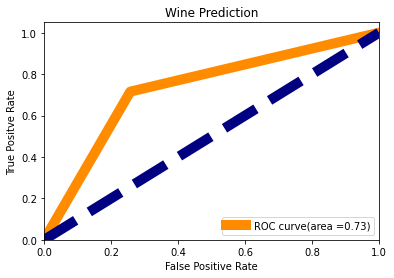

In [344]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area =%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
plt.title('Wine Prediction')
plt.legend(loc="lower right")
plt.show()


The model with extremely less outliers or without outliers performs well, We will select this Logistic regression model for now and will continue to check the accuracy score of other models

# KNN Classification

In [345]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    if knn.score(x_test,y_test) > best_score:
        best_score = knn.score(x_train,y_train)
        best_Kvalue = i
    prediction=knn.predict(x_test)
    print("Confusion Matrix with k-nearest neighbour value",i,"\n",'-'*35,"\n",confusion_matrix(y_test,prediction))


Confusion Matrix with k-nearest neighbour value 1 
 ----------------------------------- 
 [[81 56]
 [48 71]]
Confusion Matrix with k-nearest neighbour value 2 
 ----------------------------------- 
 [[112  25]
 [ 75  44]]
Confusion Matrix with k-nearest neighbour value 3 
 ----------------------------------- 
 [[88 49]
 [46 73]]
Confusion Matrix with k-nearest neighbour value 4 
 ----------------------------------- 
 [[104  33]
 [ 65  54]]
Confusion Matrix with k-nearest neighbour value 5 
 ----------------------------------- 
 [[87 50]
 [48 71]]
Confusion Matrix with k-nearest neighbour value 6 
 ----------------------------------- 
 [[102  35]
 [ 63  56]]
Confusion Matrix with k-nearest neighbour value 7 
 ----------------------------------- 
 [[95 42]
 [48 71]]
Confusion Matrix with k-nearest neighbour value 8 
 ----------------------------------- 
 [[108  29]
 [ 61  58]]
Confusion Matrix with k-nearest neighbour value 9 
 ----------------------------------- 
 [[95 42]
 [46 73]]


In [346]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.65625

Now, Let's use Bagging over our KNN Classifier and see if our score improves

In [347]:
from sklearn.ensemble import BaggingClassifier
bag_knn=BaggingClassifier(KNeighborsClassifier(n_neighbors=9),
                         n_estimators=9,max_samples=0.7,
                         bootstrap=True,random_state=99,oob_score=True)
                         

In [348]:
#With Replacement
bag_knn.fit(x_train,y_train)
bag_knn.score(x_test,y_test)

0.625

In [349]:
#Without Replacement
pasting_knn=BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                         n_estimators=9,max_samples=0.7,
                         bootstrap=False,random_state=99)
                         

In [350]:
pasting_knn.fit(x_train,y_train)
pasting_knn.score(x_test,y_test)

0.625

# Cross Validation in KNN

In [351]:
scr=cross_val_score(knn,features,target,cv=9)
print('Cross Validation score of KNN model is :',scr.mean())

Cross Validation score of KNN model is : 0.6189358372456965


Our score significantly doesnot improve with use of bagging, Also KNN Score is 65% which is less than Logistic Regression score of 73%. Hence we will not use KNN

# SVM Classification

In [352]:
from sklearn.svm import SVC
#svm=SVC()
svm = SVC(random_state=43, gamma="auto")
svm.fit(x_train,y_train)
svm.score(x_train,y_train)
prediction=svm.predict(x_test)
print('Accuracy score of SVM is :',accuracy_score(y_test,prediction))
print("Confusion Matrix\n",'-'*35,"\n",confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))

Accuracy score of SVM is : 0.64453125
Confusion Matrix
 ----------------------------------- 
 [[93 44]
 [47 72]]
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       137
           1       0.62      0.61      0.61       119

    accuracy                           0.64       256
   macro avg       0.64      0.64      0.64       256
weighted avg       0.64      0.64      0.64       256



In [353]:
scr=cross_val_score(svm,features,target,cv=5)
print('Cross Validation score of SVM model is :',scr.mean())

Cross Validation score of SVM model is : 0.6220036764705883


# Decision Tree Classifier

In [354]:
from sklearn.tree import DecisionTreeClassifier

# creating model
decTree = DecisionTreeClassifier()
params={'criterion':['entropy','ginni'],
        'max_depth':[10,15],
        'min_samples_split':[10,11],
        'min_samples_leaf':[5,6]
        }
params

{'criterion': ['entropy', 'ginni'],
 'max_depth': [10, 15],
 'min_samples_split': [10, 11],
 'min_samples_leaf': [5, 6]}

In [355]:
grid_Search=GridSearchCV(estimator=clf,param_grid=params,cv=5,n_jobs=-1)

grid_Search.fit(x_train,y_train)
print("Best_Params_",grid_Search.best_params_)


Best_Params_ {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10}


In [356]:
decTrees=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=5,max_depth=10,min_samples_split=11)
decTrees.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=11)

In [357]:
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.6875

# Rnadom Forest Classifier

In [366]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
clf_rf = RandomForestClassifier()
params={'n_estimators':[180,200],
        'criterion':['entropy','ginni'],
        'max_depth':[10,15],
        'min_samples_split':[10,11],
        'min_samples_leaf':[5,6]
        }
params

{'n_estimators': [180, 200],
 'criterion': ['entropy', 'ginni'],
 'max_depth': [10, 15],
 'min_samples_split': [10, 11],
 'min_samples_leaf': [5, 6]}

In [367]:
grd=GridSearchCV(clf_rf,param_grid=params)
grd.fit(x_train,y_train)
print("Best_Params_",grd.best_params_)


Best_Params_ {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 200}


In [368]:
#Lets reinsantiate with best params now
clf_rf=grd.best_estimator_

In [370]:
clf_rf.fit(x_train,y_train)
y_pred=clf_rf.predict(x_test)
rf_conf_matrix=confusion_matrix(y_test,y_pred)
print('\n Confusion Matrix => \n',rf_conf_matrix)


 Confusion Matrix => 
 [[102  35]
 [ 33  86]]


In [371]:
print('\n Accuracy of Random Forest is :',accuracy_score(y_test,y_pred))


 Accuracy of Random Forest is : 0.734375


In [372]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       137
           1       0.71      0.72      0.72       119

    accuracy                           0.73       256
   macro avg       0.73      0.73      0.73       256
weighted avg       0.73      0.73      0.73       256



In [373]:

scr=cross_val_score(clf,features,target,cv=5)
print('Cross Validation score of Random Forest is :',scr.mean())

Cross Validation score of Random Forest is : 0.7284742647058824


# HyperParameter Tuning

In [229]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import xgboost

In [230]:
#Parameters

params={"Learning_rate":[0.05,0.1,0.2,0.25,0.3,0.35],
       "max_depth":[3,4,5,6,8,9,10,12],
       "min_child_weight":[1,3,5,7,10],
       "colsample_bytree":[0.3,0.5,0.7,0.9]}

# XGBOOST

In [231]:
#intialize the classifier with xgboost
classifier=xgboost.XGBClassifier()

In [232]:
rf_model=RandomizedSearchCV(classifier,param_distributions=params,n_iter=10,cv=10,scoring='roc_auc',n_jobs=-1,verbose=3)

In [234]:
rf_model.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[03:32:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "Learning_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:32:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraint...
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None,
                           

In [235]:
rf_model.best_estimator_

XGBClassifier(Learning_rate=0.35, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [236]:
rf_model.best_params_

{'min_child_weight': 1,
 'max_depth': 3,
 'colsample_bytree': 0.5,
 'Learning_rate': 0.35}

In [237]:
best_random=rf_model.best_estimator_
best_random

XGBClassifier(Learning_rate=0.35, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [240]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

random_pred=best_random.predict(x_test)
print("accuracy_score",accuracy_score(y_test,random_pred))
print("\nclassification_report\n",classification_report(y_test,random_pred))
print("confusion_matrix\n",confusion_matrix(y_test,random_pred))

accuracy_score 0.7265625

classification_report
               precision    recall  f1-score   support

           0       0.75      0.74      0.74       137
           1       0.70      0.71      0.71       119

    accuracy                           0.73       256
   macro avg       0.73      0.73      0.73       256
weighted avg       0.73      0.73      0.73       256

confusion_matrix
 [[101  36]
 [ 34  85]]


# HyperParameter with RandomforestClassifier

In [249]:
#Number of trees in the random forest
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]

#Number of features to be considerd at every split
max_features=['auto','sqrt','log2']
#Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(10,1000,10)]

#Number of samples required for split a node
min_samples_split=[2,5,10,14]
#Number of samples required at each leaf node
min_samples_leaf=[2,3,6,8,10]

random_grid={
    "n_estimators":n_estimators,
            "max_features":max_features,
            "max_depth":max_depth,
            "min_samples_split":min_samples_split,
            "min_samples_leaf":min_samples_leaf,
            "criterion":['entrophy','gini']
            }

random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'min_samples_split': [2, 5, 10, 14],
 'min_samples_leaf': [2, 3, 6, 8, 10],
 'criterion': ['entrophy', 'gini']}

In [250]:
rf=RandomForestClassifier()
random_model=RandomizedSearchCV(rf,param_distributions=random_grid,cv=10,n_iter=100,verbose=3,n_jobs=-1,random_state=42)

In [251]:
random_model.fit(x_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entrophy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 6, 8, 10],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=3)

In [252]:
random_model.best_estimator_

RandomForestClassifier(max_depth=890, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=1400)

In [253]:
random_model.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 890,
 'criterion': 'gini'}

In [254]:
random_pred1=random_model.best_estimator_
random_pred1

RandomForestClassifier(max_depth=890, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=1400)

In [255]:
rand_pred=random_pred1.predict(x_test)

In [256]:
print(accuracy_score(y_test,rand_pred))
print(classification_report(y_test,rand_pred))
print(confusion_matrix(y_test,rand_pred))

0.7421875
              precision    recall  f1-score   support

           0       0.77      0.74      0.76       137
           1       0.72      0.74      0.73       119

    accuracy                           0.74       256
   macro avg       0.74      0.74      0.74       256
weighted avg       0.74      0.74      0.74       256

[[102  35]
 [ 31  88]]


Accuracy of Random Forest is 73.43% and Accuracy of Random Forest Classifier using Hyperparameter tuning is 74.22%.

So we will go with Random Forest Classifier Algorithm

# Saving the model in Pickel Format

In [257]:
from joblib import dump , load
#filename="RedWine.pkl"
dump(rf,'RedWine.joblib')
dt=load('RedWine.joblib')

In [258]:
from tempfile import mkdtemp
savedir = mkdtemp()
import os
filename = os.path.join(savedir, 'RedWine.joblib')

In [259]:
import joblib
joblib.dump(dt, filename) 
#['...RedWine.joblib']

['C:\\Users\\mum1user\\AppData\\Local\\Temp\\tmpcdn7_4e3\\RedWine.joblib']

In [260]:
joblib.load(filename)

RandomForestClassifier()